<a href="https://colab.research.google.com/github/alisad68/My-Investigation/blob/main/C1_Computer_Vision_Horse_VS_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi.
In this Program, which is based on my Coursera assinment or exresises, a model is developed for distinguishing between Human and Horse images. 
1. For training the model "Horses or Humans" dataset is used. This contains over a thousand images of horses and humans with varying poses and filesizes. Some of the images are showed to get a better sense of what they look like.
2. ImageDataGenerator class is used to prepare the dataset, so it can be fed to a convolutional neural network.
3. The model is developed through TensorFlow, and totally 5 Convolution layers are used (The model architecture can be checked via `model.summary()`.
4. The model is trained with `binary_crossentropy` loss and `RMSprop` optimizer.
5. Preprocessing of images is done by ImageDataGenerator; the images are auto-labeled, and they are fed to the model in baches of 128 and size of 300*300
6. 




In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-05-04 14:10:57--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  40.4MB/s    in 4.1s    

2023-05-04 14:11:01 (34.6 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse20-1.png', 'horse05-6.png', 'horse01-5.png', 'horse37-0.png', 'horse28-4.png', 'horse31-6.png', 'horse45-2.png', 'horse06-6.png', 'horse38-0.png', 'horse21-6.png']
['human02-04.png', 'human06-20.png', 'human14-22.png', 'human04-27.png', 'human02-12.png', 'human13-15.png', 'human12-17.png', 'human16-19.png', 'human04-05.png', 'human05-00.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

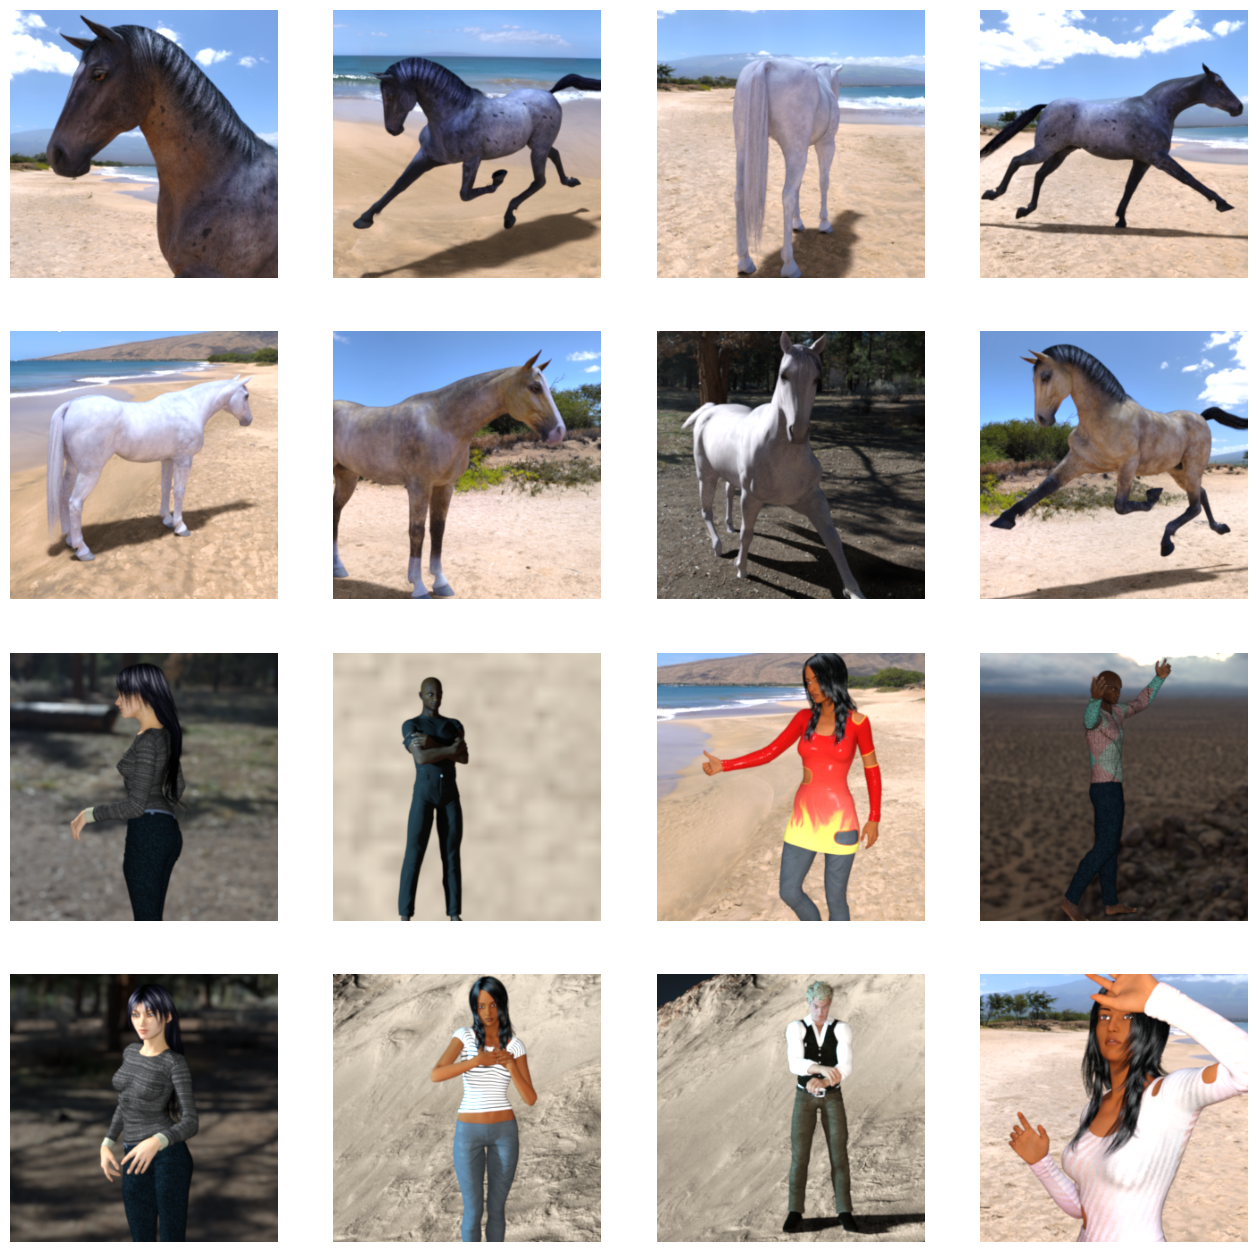

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 24s 981ms/step - loss: 0.7161 - accuracy: 0.5495
Epoch 2/15
8/8 [==============================] - 7s 841ms/step - loss: 0.6607 - accuracy: 0.6029
Epoch 3/15
8/8 [==============================] - 7s 842ms/step - loss: 0.6450 - accuracy: 0.6563
Epoch 4/15
8/8 [==============================] - 8s 934ms/step - loss: 0.8498 - accuracy: 0.6107
Epoch 5/15
8/8 [==============================] - 8s 956ms/step - loss: 0.2526 - accuracy: 0.9121
Epoch 6/15
8/8 [==============================] - 7s 852ms/step - loss: 0.1941 - accuracy: 0.9277
Epoch 7/15
8/8 [==============================] - 8s 971ms/step - loss: 0.2352 - accuracy: 0.9055
Epoch 8/15
8/8 [==============================] - 8s 954ms/step - loss: 0.2284 - accuracy: 0.9166
Epoch 9/15
8/8 [==============================] - 7s 844ms/step - loss: 0.1864 - accuracy: 0.9221
Epoch 10/15
8/8 [==============================] - 7s 839ms/step - loss: 0.6316 - accuracy: 0.8877
Epoch 11/15
8/8 [=

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving hh4.jpg to hh4.jpg
1/1 [==============================] - 0s 327ms/step
[0.15153804]
hh4.jpg is a horse
